<img src="https://www.kaggle.com/static/images/site-logo.png" width="100px">

**A Tutorial on Different approaches for Outlier Detection**

<img src="https://cdn-images-1.medium.com/max/1200/1*jHnpc23F7-rh9cLkh-028g.png" width="700px">

Context
Manufacturing process feature selection and categorization

Content
Abstract: Data from a semi-conductor manufacturing process

- Data Set Characteristics: Multivariate
- Number of Instances: 1567
- Area: Computer
- Attribute Characteristics: Real
- Number of Attributes: 591
- Date Donated: 2008-11-19
- Associated Tasks: Classification,Causal-Discovery
- Missing Values? Yes

A complex modern semi-conductor manufacturing process is normally under consistent
surveillance via the monitoring of signals/variables collected from sensors and or
process measurement points. However, not all of these signals are equally valuable
in a specific monitoring system. The measured signals contain a combination of
useful information, irrelevant information as well as noise. It is often the case
that useful information is buried in the latter two. Engineers typically have a
much larger number of signals than are actually required. If we consider each type
of signal as a feature, then feature selection may be applied to identify the most
relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will
enable an increase in process throughput, decreased time to learning and reduce the
per unit production costs.

To enhance current business improvement techniques the application of feature
selection as an intelligent systems technique is being investigated.

The dataset presented in this case represents a selection of such features where
each example represents a single production entity with associated measured
features and the labels represent a simple pass/fail yield for in house line
testing, figure 2, and associated date time stamp. Where .1 corresponds to a pass
and 1 corresponds to a fail and the data time stamp is for that specific test
point.

Using feature selection techniques it is desired to rank features according to
their impact on the overall yield for the product, causal relationships may also be
considered with a view to identifying the key features.

Results may be submitted in terms of feature relevance for predictability using
error rates as our evaluation metrics. It is suggested that cross validation be
applied to generate these results. Some baseline results are shown below for basic
feature selection techniques using a simple kernel ridge classifier and 10 fold
cross validation.

Baseline Results: Pre-processing objects were applied to the dataset simply to
standardize the data and remove the constant features and then a number of
different feature selection objects selecting 40 highest ranked features were
applied with a simple classifier to achieve some initial results. 10 fold cross
validation was used and the balanced error rate (*BER) generated as our initial
performance metric to help investigate this dataset.

SECOM Dataset: 1567 examples 591 features, 104 fails

FSmethod (40 features) BER % True + % True - %
S2N (signal to noise) 34.5 +-2.6 57.8 +-5.3 73.1 +2.1
Ttest 33.7 +-2.1 59.6 +-4.7 73.0 +-1.8
Relief 40.1 +-2.8 48.3 +-5.9 71.6 +-3.2
Pearson 34.1 +-2.0 57.4 +-4.3 74.4 +-4.9
Ftest 33.5 +-2.2 59.1 +-4.8 73.8 +-1.8
Gram Schmidt 35.6 +-2.4 51.2 +-11.8 77.5 +-2.3

Attribute Information:

Key facts: Data Structure: The data consists of 2 files the dataset file SECOM
consisting of 1567 examples each with 591 features a 1567 x 591 matrix and a labels
file containing the classifications and date time stamp for each example.

As with any real life data situations this data contains null values varying in
intensity depending on the individuals features. This needs to be taken into
consideration when investigating the data either through pre-processing or within
the technique applied.

The data is represented in a raw text file each line representing an individual
example and the features seperated by spaces. The null values are represented by
the 'NaN' value as per MatLab.

Acknowledgements
Authors: Michael McCann, Adrian Johnston

Inspiration
Semiconductor manufacturing has multi dimensional description of each process. Can we find key performance index by using big data techniques?

**Import Some Basic Libraries**

In [2]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# to avoid warnings
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading the Data(UCI- SECOM Dataset)**

In [3]:
# reading the data
data = pd.read_csv('/content/drive/My Drive/Data/uci-secom.csv')

# getting the shape of the data
print(data.shape)

(1567, 592)


In [4]:
# getting the head of the data
data.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
# checking if the dataset contains any NULL values

data.isnull().any().any()

True

In [ ]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# so better we not take median or mean and replace them with zeros

data = data.replace(np.NaN, 0)

# again, checking if there is any NULL values left
data.isnull().any().any()

False

**Data Visualization**

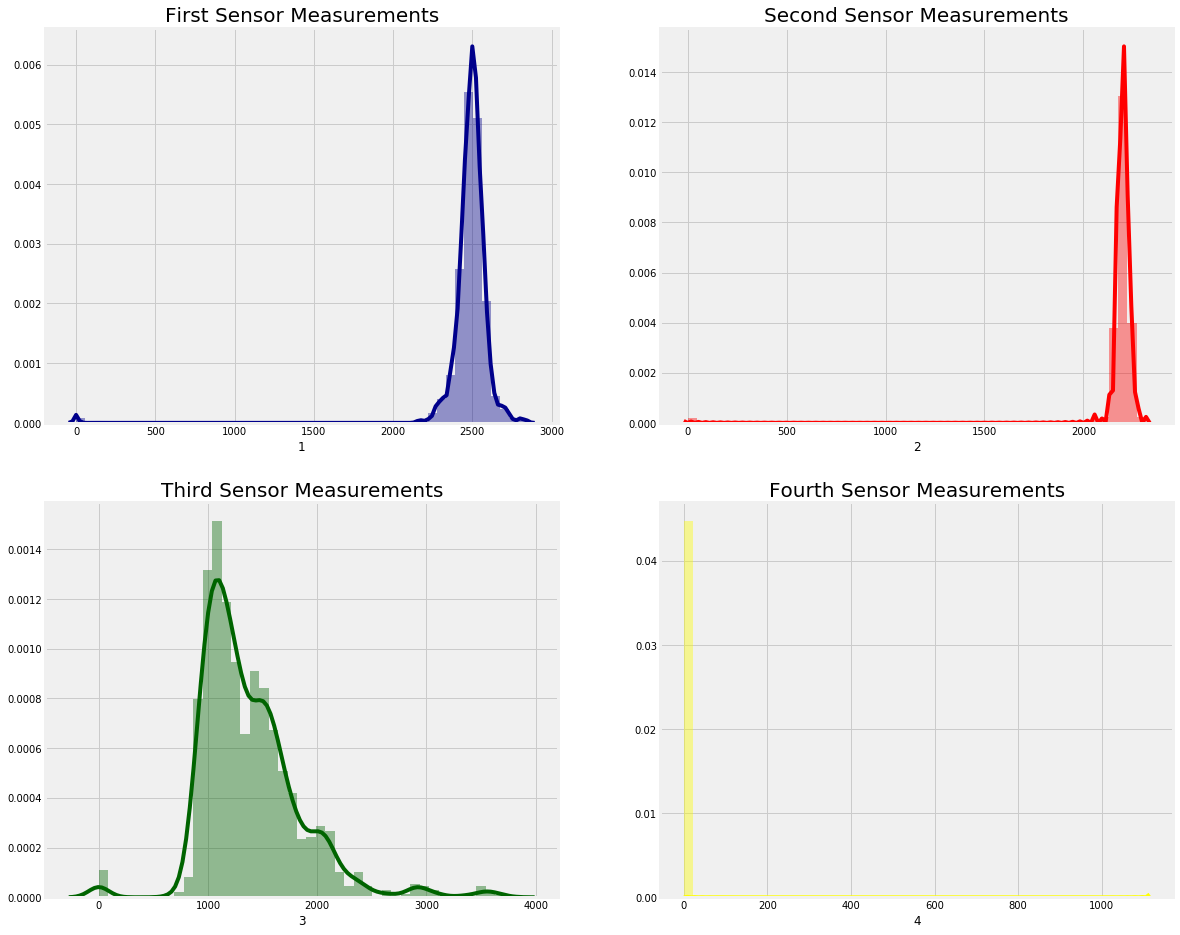

In [ ]:
# distribution plot to see first four column's distribution

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.distplot(data['1'], color = 'darkblue')
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
sns.distplot(data['2'], color = 'red')
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
sns.distplot(data['3'], color = 'darkgreen')
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
sns.distplot(data['4'], color = 'yellow')
plt.title('Fourth Sensor Measurements', fontsize = 20)

plt.show()

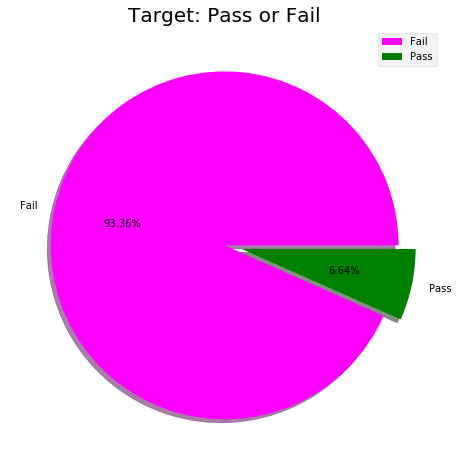

In [ ]:
# pie chart

labels = ['Fail', 'Pass']
size = data['Pass/Fail'].value_counts()
colors = ['magenta', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Heatmap for the Data')

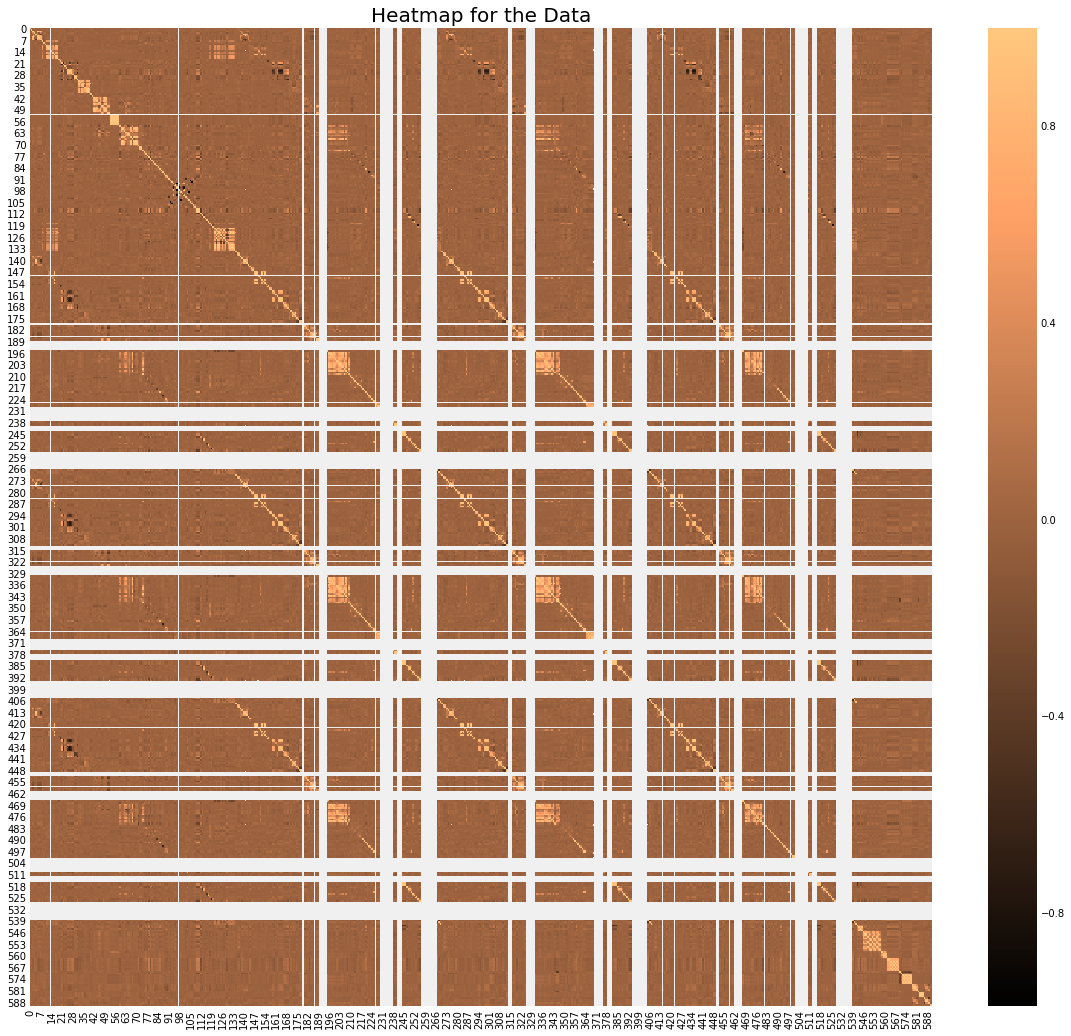

In [ ]:
# heatmap

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = 'copper')
plt.title('Heatmap for the Data', fontsize = 20)

**Data Preprocessing**

In [ ]:
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting a column
data.shape

(1567, 591)

In [ ]:
# separating the dependent and independent data

x = data.iloc[:,:590]
y = data.iloc[:, 590]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 590)
shape of y: (1567,)


In [ ]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1253, 590)
shape of x_test:  (314, 590)
shape of y_train:  (1253,)
shape of y_test:  (314,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## 1. UnderSamling of the Dataset

> Under-representation of a class in one or more important predictor variables. Suppose, to address the question of gender discrimination, we have survey data on salaries within a particular field, e.g., computer software. It is known women are under-represented considerably in a random sample of software engineers, which would be important when adjusting for other variables such as years employed and current level of seniority. Suppose only 20% of software engineers are women, i.e., males are 4 times as frequent as females. If we were designing a survey to gather data, we would survey 4 times as many females as males, so that in the final sample, both genders will be represented equally. (See also Stratified Sampling.)
Under-representation of one class in the outcome (dependent) variable. Suppose we want to predict, from a large clinical dataset, which patients are likely to develop a particular disease (e.g., diabetes). Assume, however, that only 10% of patients go on to develop the disease. Suppose we have a large existing dataset. We can then pick 1/9th the number of patients who did not go on to develop the disease for every one patient who did.

In [ ]:
# Under Sampling

failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [ ]:
normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [ ]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [ ]:
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [ ]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [ ]:

# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 590)
(208, 1)


In [ ]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train_us)
x_test = sc.transform(x_test_us)

**Xg-Boost Classifier**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Confusion Matrix after UnderSampling with XgBoost**

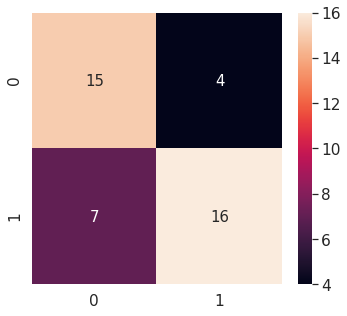

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_us, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

# It is able to predict 17 defected semiconductors among 21 Semi-Conductors

> **UnderSamoling,** It successfully detected 17 out of 22 defected semiconductors which is great. It would have work much better if we had some more data.

In [ ]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.608433734939759
Best Parameter:  {'max_depth': 5}


In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 4, scale_pos_weights = weights, n_jobs = 4)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

**Most Important Features of the Model**

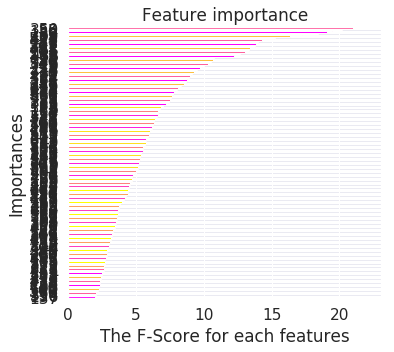

In [ ]:
# plotting the feature importances

colors = plt.cm.spring(np.linspace(0, 1, 9))
xgb.plot_importance(model, height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (18, 20)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

## 2. Over-Sampling

>** SMOTE :**
There are a number of methods available to oversample a dataset used in a typical classification problem (using a classification algorithm to classify a set of images, given a labelled training set of images). The most common technique is known as SMOTE: Synthetic Minority Over-sampling Technique.[4] To illustrate how this technique works consider some training data which has s samples, and f features in the feature space of the data. Note that these features, for simplicity, are continuous. As an example, consider a dataset of birds for classification. The feature space for the minority class for which we want to oversample could be beak length, wingspan, and weight (all continuous). To then oversample, take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.

Many modifications and extensions have been made to the SMOTE method ever since its proposal

In [ ]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

Using TensorFlow backend.


(226, 590)
(226,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train_os.shape)
print(y_train_os.shape)
print(x_test_os.shape)
print(y_test_os.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_os = sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

**Xg-Boost Classifier**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()

model.fit(x_train_os, y_train_os)

y_pred = model.predict(x_test_os)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

# making a parameters list
parameters = [{'max_depth' : [1, 10, 5, 7]}]

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)
grid_search = grid_search.fit(x_train_os, y_train_os)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_



/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.608433734939759
Best Parameter:  {'max_depth': 1}


In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 10, scale_pos_weights = weights, n_jobs = 4)

model.fit(x_train_os, y_train_os)

y_pred = model.predict(x_test_os)


**Confusion Matrix after OverSampling with XgBoost**

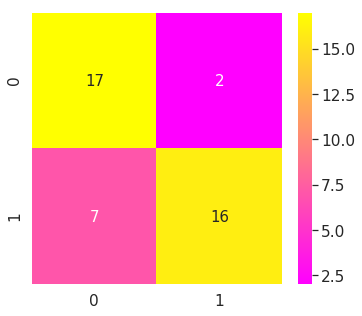

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_os, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, cmap = 'spring')

>** OverSampling**, Successfully detected 17 detected pieces out of 22, That is great according to accuracy. It would very well, if the size of the dataset would have been a little bigger.

## 3. Different Classifiers for Outlier Detection

## 3.1 Isolation Forest Classifier

**Isolation Forest Algorithm:**

>One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

>This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

>Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

**How Isolation Forests Work**

>The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

>The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


In [ ]:
# again creating x and y from the dataset

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (1567, 590)
Shape of y: (1567,)


In [ ]:
# splittng the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# print the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (1253, 590)
Shape of x_test : (314, 590)
Shape of y_train : (1253,)
Shape of y_test : (314,)


In [ ]:
# defining outlier fraction

Fraud = data[data['Pass/Fail']==1]
Valid = data[data['Pass/Fail']==-1]

outlier_fraction = len(Fraud)/float(len(Valid))
print("Outlier Fraction :", outlier_fraction)

Outlier Fraction : 0.0710868079289132


In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, max_samples=len(x_train), 
                                       contamination=outlier_fraction, random_state=0, verbose=0)
model.fit(x_train, y_train)
scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


**Confusion Matrix for Isolation Forest**

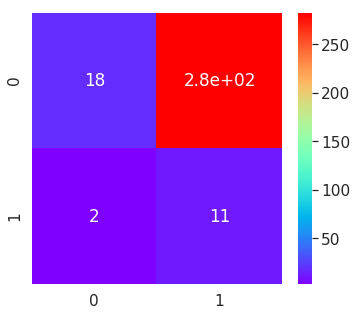

In [ ]:
# evaluating the model

# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

> **Isolation Forest Classifier,** Succesfully detected 11 defected items out of 13, that makes an impeccable accuracy of 85% Recall Accuracy. This algorithm would have been worked even better if the data was a little bigger with more instances of defected items.

## 3.2 Local Outlier Factor


** Local Outlier Factor(LOF) Algorithm**
>The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

>The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor


model = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
                           metric_params=None, contamination=outlier_fraction)

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)


**Confusion Matrix for Local Outlier Factor**

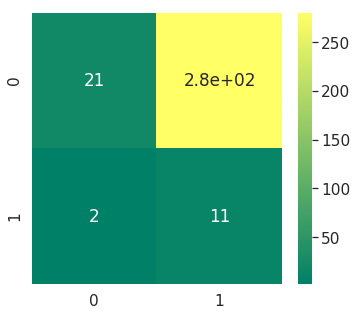

In [ ]:
# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'summer')


> **Local Outlier Factor Classifier,** Succesfully detected 11 defected items out of 13, that makes an impeccable accuracy of 85% Recall Accuracy. This algorithm would have been worked even better if the data was a little bigger with more instances of defected items.

## 3.3 One Class SVM

> In one-class SVM, the support vector model is trained on data that has only one class, which is the “normal” class. It infers the properties of normal cases and from these properties can predict which examples are unlike the normal examples. This is useful for anomaly detection because the scarcity of training examples is what defines anomalies: that is, typically there are very few examples of the network intrusion, fraud, or other anomalous behavior.

In [ ]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1, random_state=0)

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/classes.py:1185: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/classes.py:1185: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


**Confusion Matrix for One Class SVM**

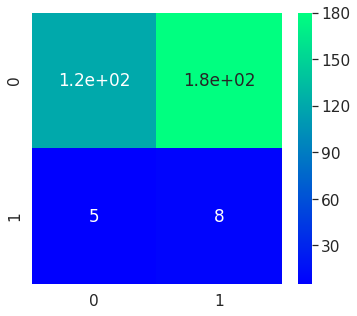

In [ ]:

# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm ,annot = True, cmap = 'winter')


> **One Class SVM**, Successfully Identifies 8 out of 13 defected Items, Which is not better than Isolation Forest and Local Factor Outlier Algorithm, as they both Identified 11 out 13 defected Item. Maybe, OneClassSVM would have worked better with more instances of defected items.

## Comparison of All Algorithms' Recall Rate

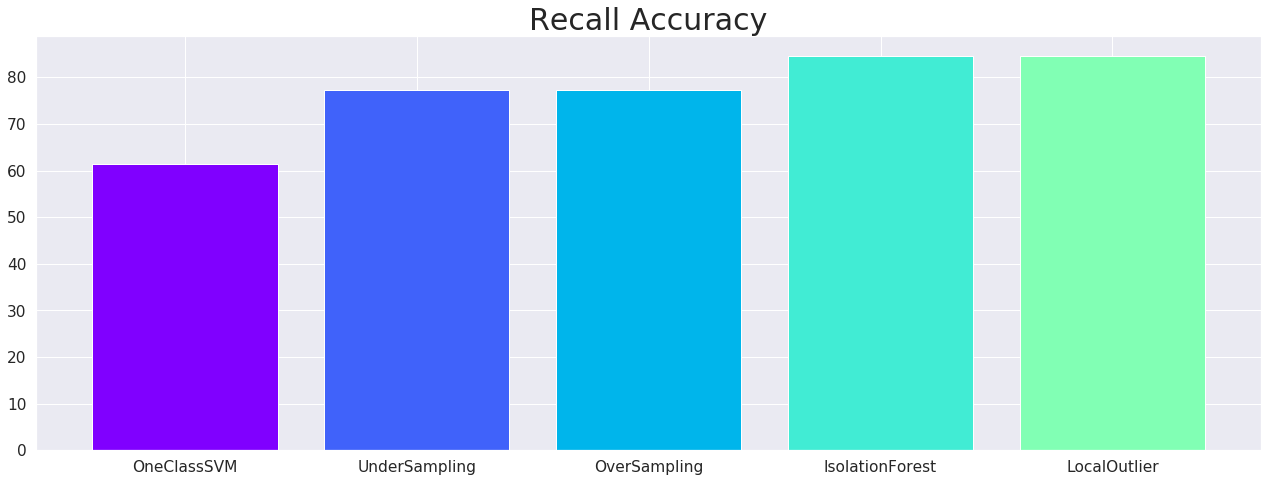

In [ ]:
Recall = np.array([77.3, 77.3, 84.6, 84.6, 61.5])
label = np.array(['UnderSampling', 'OverSampling', 'IsolationForest', 'LocalOutlier', 'OneClassSVM'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

> We can see that Isolation Forest and Local Outlier Factor works best and then Over sampling and UnderSampling works Good with average performance whereas OneClass could not perform in this scenario.

**Thanks for Reading kernel, Please Suggest Changes if you have ideas.**